In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, roc_auc_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("data_cardiovascular_risk.csv")  

In [3]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
null_count = df.isnull().sum()
print('Number of null values:', null_count)

Number of null values: id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


## Handling Missing Values

### Education - Bp-meds 

In [5]:
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

### Cigs_per_day

In [6]:
df.cigsPerDay.mean().round(0),df.cigsPerDay.median()

(9.0, 0.0)

In [7]:
df[df['cigsPerDay'].isna()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,767,54,1.0,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,1461,47,2.0,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,1467,49,1.0,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,1597,57,1.0,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,1986,49,2.0,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


In [8]:
df[df['is_smoking']=='YES']['cigsPerDay'].mean(),df[df['is_smoking']=='YES']['cigsPerDay'].median()

(18.345945945945946, 20.0)

In [9]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df[df['is_smoking']=='YES']['cigsPerDay'].median())

In [10]:
df[(df['is_smoking']=='NO') & (df['cigsPerDay']>0)]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [11]:
df[(df['is_smoking']=='YES') & (df['cigsPerDay']==0)]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### Cholesterol - BMI - Heartrate

In [12]:
df.totChol.mean(),df.totChol.median()

(237.07428400954655, 234.0)

In [13]:
df.BMI.mean(),df.BMI.median()

(25.7949644549763, 25.38)

In [14]:
df.heartRate.mean(),df.heartRate.median()

(75.97727943346119, 75.0)

In [15]:
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [16]:
df.totChol.mean(),df.totChol.median()

(237.03982300884957, 234.0)

In [17]:
df.BMI.mean(),df.BMI.median()

(25.793250737463126, 25.38)

In [18]:
df.heartRate.mean(),df.heartRate.median()

(75.97699115044247, 75.0)

### Glucose

In [19]:
df.glucose.isna().sum()

304

In [20]:
df.glucose.mean(),df.glucose.median(),df.glucose.mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

In [21]:
df['sex'] = np.where(df['sex'] == 'M',1,0)
df['is_smoking'] = np.where(df['is_smoking'] == 'YES',1,0)

In [22]:
# changing datatypes
df = df.astype({'age': int,'sex':int,'is_smoking':int,'cigsPerDay':int,
               'BPMeds':int,'prevalentStroke':int,'prevalentHyp':int,'diabetes':int,
               'totChol':float,'sysBP':float,'diaBP':float,
               'BMI':float,'heartRate':float,'glucose':float,'TenYearCHD':int})

In [23]:
# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

In [24]:
# mean, median, and mode for glucose after knn imputation
df.glucose.mean(),df.glucose.median(),df.glucose.mode()

(82.07203539823007,
 78.05,
 0    75.0
 Name: glucose, dtype: float64)

In [25]:
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [26]:
df=df[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','sex','BPMeds','diabetes','TenYearCHD']]
df.head()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,sex,BPMeds,diabetes,TenYearCHD
0,148.0,80.0,64.0,3.0,221.0,85.0,0.0,0.0,0.0,0.0,1.0
1,168.0,75.0,36.0,0.0,212.0,98.0,1.0,1.0,0.0,0.0,0.0
2,116.0,94.0,46.0,10.0,250.0,71.0,0.0,0.0,0.0,0.0,0.0
3,158.0,94.0,50.0,20.0,233.0,88.0,1.0,1.0,0.0,0.0,1.0
4,136.5,77.0,64.0,30.0,241.0,85.0,0.0,0.0,0.0,0.0,0.0


In [27]:
scaler = StandardScaler()
features = [i for i in df.columns if i not in ['TenYearCHD']]

In [28]:
features

['sysBP',
 'glucose',
 'age',
 'cigsPerDay',
 'totChol',
 'diaBP',
 'prevalentHyp',
 'sex',
 'BPMeds',
 'diabetes']

In [29]:
df[features] = scaler.fit_transform(df[features])

## Splitting Data as Train and Test

In [30]:
X = df.drop('TenYearCHD', axis=1)  
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_x = scaler.fit_transform(X_train)
test_x = scaler.transform(X_test)

## Handling Imbalanced Dataset

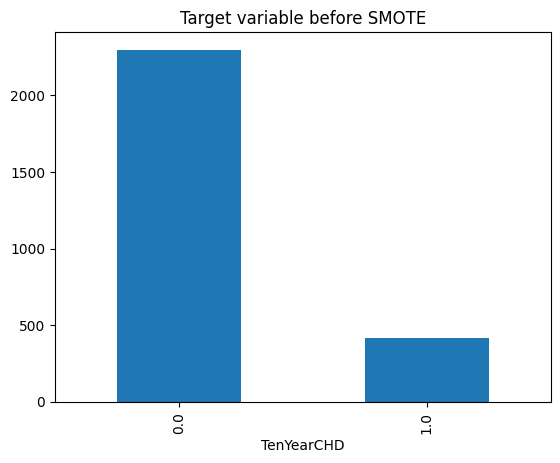

In [31]:
# Handling Imbalanced Dataset (If needed)

# Visualize the target variable before SMOTE
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')
plt.show()

In [32]:
X_smote, y_smote = SMOTETomek(random_state=0).fit_resample(X_train, y_train)

print('Samples in the original dataset: ', len(y_train))
print('Samples in the resampled dataset: ', len(y_smote))

Samples in the original dataset:  2712
Samples in the resampled dataset:  4514


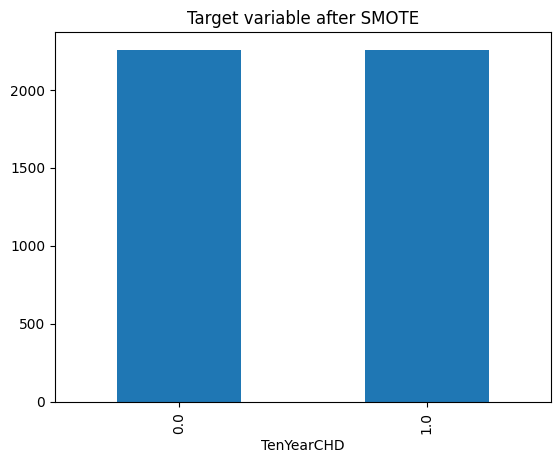

In [33]:
# Visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')
plt.show()

In [34]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]
    
    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(10,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()

    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

## Logistic Regression


Train ROC AUC: 0.6902968542312805
Test ROC AUC: 0.6672729208439057


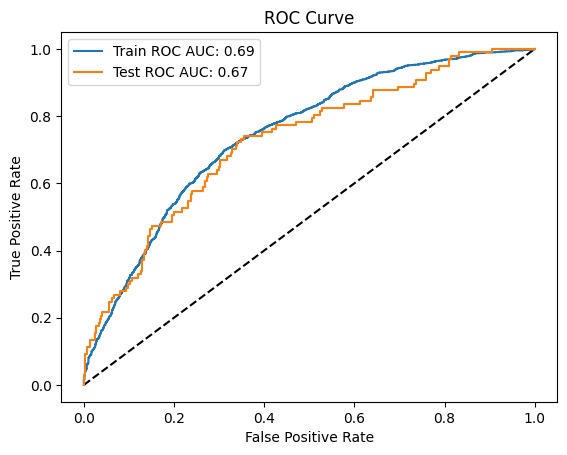


Confusion Matrix:


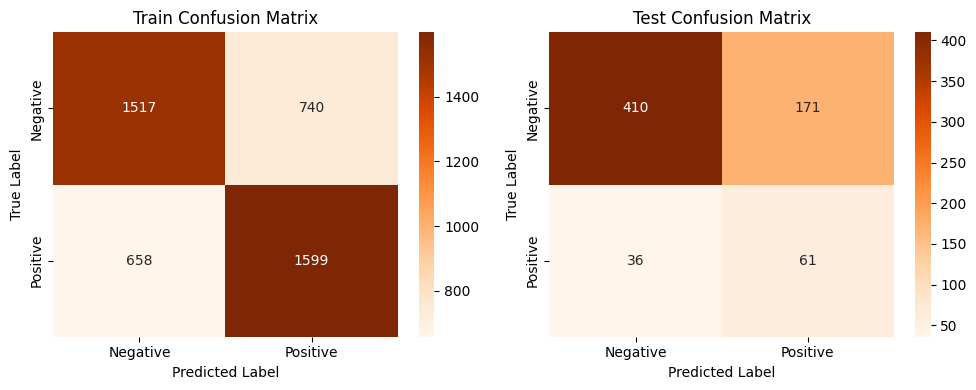


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.697471 | 0.672131 |   0.684567 | 2257        |
| 1.0          |    0.683625 | 0.708463 |   0.695822 | 2257        |
| accuracy     |    0.690297 | 0.690297 |   0.690297 |    0.690297 |
| macro avg    |    0.690548 | 0.690297 |   0.690195 | 4514        |
| weighted avg |    0.690548 | 0.690297 |   0.690195 | 4514        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.919283 | 0.70568  |   0.798442 | 581       |
| 1.0          |    0.262931 | 0.628866 |   0.370821 |  97       |
| accuracy     |    0.69469  | 0.69469  |   0.69469  |   0.69469 |
| macro avg    |    0.591107 | 0.667273 |   0.584631 | 678       |
| weighted avg |    0.82538  | 0.69469  |   0.737263 | 6

In [35]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_score = evaluate_model(lr_model, X_smote, X_test, y_smote, y_test)

In [36]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])    
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.690548
Precision Test,0.825380
Recall Train,0.690297
Recall Test,0.694690
Accuracy Train,0.690297
Accuracy Test,0.694690
ROC-AUC Train,0.690297
ROC-AUC Test,0.667273
F1 macro Train,0.690195
F1 macro Test,0.737263


## Random Forest


Train ROC AUC: 1.0
Test ROC AUC: 0.5969710949837642


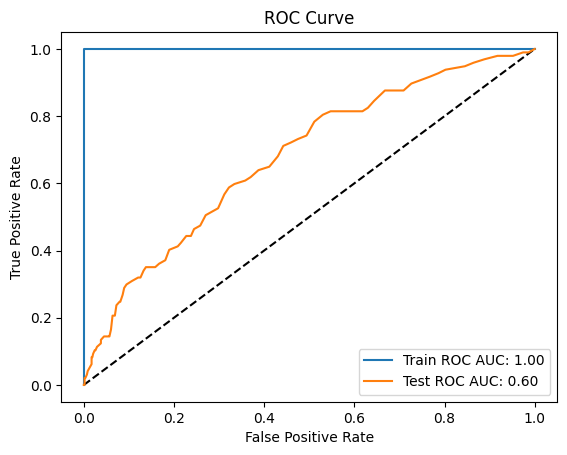


Confusion Matrix:


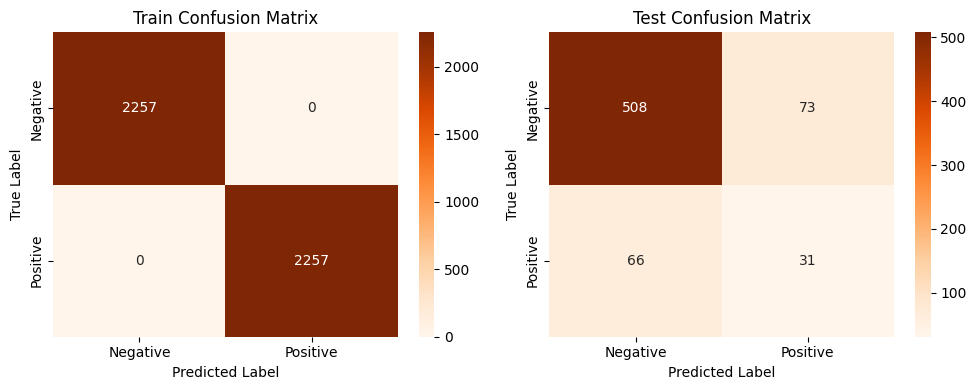


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2257 |
| 1.0          |           1 |        1 |          1 |      2257 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4514 |
| weighted avg |           1 |        1 |          1 |      4514 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.885017 | 0.874355 |   0.879654 | 581        |
| 1.0          |    0.298077 | 0.319588 |   0.308458 |  97        |
| accuracy     |    0.794985 | 0.794985 |   0.794985 |   0.794985 |
| macro avg    |    0.591547 | 0.596971 |   0.594056 | 678        |
| weighted avg |    0.801045 | 0.794985 |   0.797934 | 678      

In [37]:
rf_model = RandomForestClassifier(random_state=0)
rf_score = evaluate_model(rf_model, X_smote, X_test, y_smote, y_test)

In [38]:
score['Random Forest'] = rf_score
score

,Logistic regression,Random Forest
Precision Train,0.690548,1.000000
Precision Test,0.825380,0.801045
Recall Train,0.690297,1.000000
Recall Test,0.694690,0.794985
Accuracy Train,0.690297,1.000000
Accuracy Test,0.694690,0.794985
ROC-AUC Train,0.690297,1.000000
ROC-AUC Test,0.667273,0.596971
F1 macro Train,0.690195,1.000000
F1 macro Test,0.737263,0.797934


## eXtreme Gradient Boosting


Train ROC AUC: 0.9909171466548515
Test ROC AUC: 0.5927036570434906


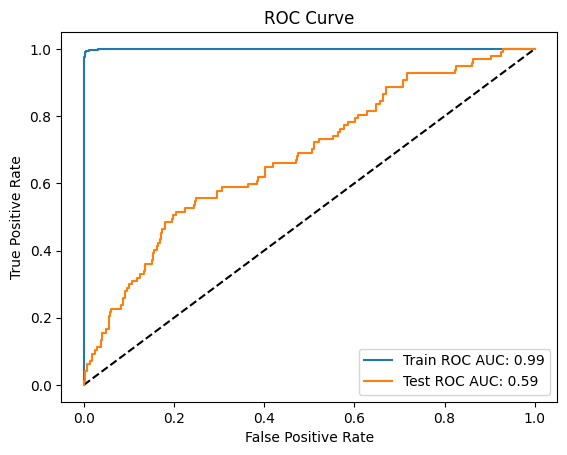


Confusion Matrix:


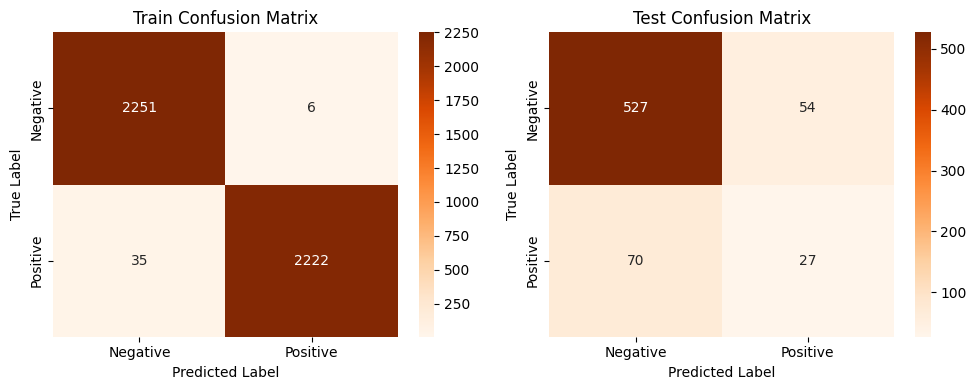


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.984689 | 0.997342 |   0.990975 | 2257        |
| 1.0          |    0.997307 | 0.984493 |   0.990858 | 2257        |
| accuracy     |    0.990917 | 0.990917 |   0.990917 |    0.990917 |
| macro avg    |    0.990998 | 0.990917 |   0.990917 | 4514        |
| weighted avg |    0.990998 | 0.990917 |   0.990917 | 4514        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.882747 | 0.907057 |   0.894737 | 581        |
| 1.0          |    0.333333 | 0.278351 |   0.303371 |  97        |
| accuracy     |    0.817109 | 0.817109 |   0.817109 |   0.817109 |
| macro avg    |    0.60804  | 0.592704 |   0.599054 | 678        |
| weighted avg |    0.804144 | 0.817109 |   0.8101

In [39]:
xgb_model = xgb.XGBClassifier()
xgb_score = evaluate_model(xgb_model, X_smote, X_test, y_smote, y_test)

In [40]:
score['XGB'] = xgb_score
score

,Logistic regression,Random Forest,XGB
Precision Train,0.690548,1.000000,0.990998
Precision Test,0.825380,0.801045,0.804144
Recall Train,0.690297,1.000000,0.990917
Recall Test,0.694690,0.794985,0.817109
Accuracy Train,0.690297,1.000000,0.990917
Accuracy Test,0.694690,0.794985,0.817109
ROC-AUC Train,0.690297,1.000000,0.990917
ROC-AUC Test,0.667273,0.596971,0.592704
F1 macro Train,0.690195,1.000000,0.990917
F1 macro Test,0.737263,0.797934,0.810131



Train ROC AUC: 0.6101019051838724
Test ROC AUC: 0.6356264527920222


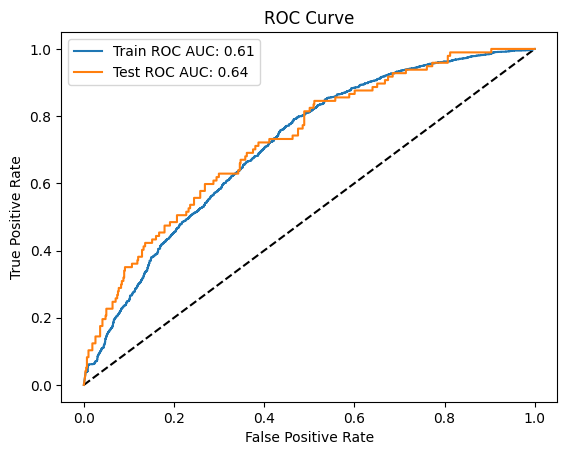


Confusion Matrix:


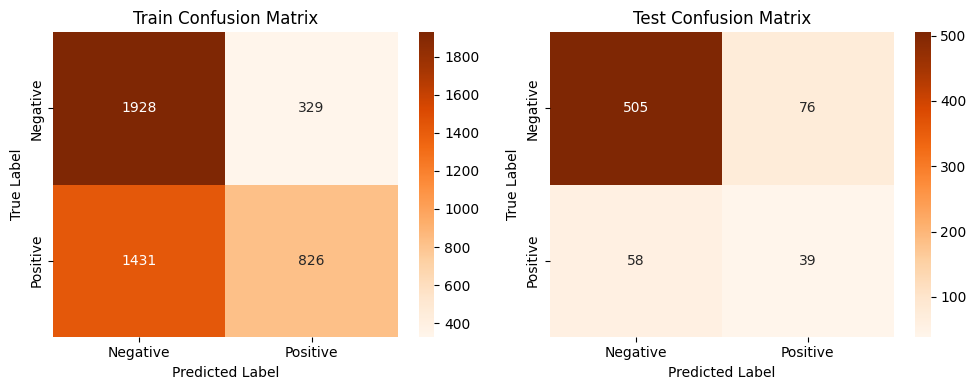


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.57398  | 0.854231 |   0.68661  | 2257        |
| 1.0          |    0.715152 | 0.365973 |   0.484174 | 2257        |
| accuracy     |    0.610102 | 0.610102 |   0.610102 |    0.610102 |
| macro avg    |    0.644566 | 0.610102 |   0.585392 | 4514        |
| weighted avg |    0.644566 | 0.610102 |   0.585392 | 4514        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.89698  | 0.869191 |   0.882867 | 581       |
| 1.0          |    0.33913  | 0.402062 |   0.367925 |  97       |
| accuracy     |    0.80236  | 0.80236  |   0.80236  |   0.80236 |
| macro avg    |    0.618055 | 0.635626 |   0.625396 | 678       |
| weighted avg |    0.81717  | 0.80236  |   0.809195 | 6

In [41]:
nb_model = GaussianNB()
nb_score = evaluate_model(nb_model, X_smote, X_test, y_smote, y_test)

In [42]:
score['Naive Bayes'] = nb_score
score

,Logistic regression,Random Forest,XGB,Naive Bayes
Precision Train,0.690548,1.000000,0.990998,0.644566
Precision Test,0.825380,0.801045,0.804144,0.817170
Recall Train,0.690297,1.000000,0.990917,0.610102
Recall Test,0.694690,0.794985,0.817109,0.802360
Accuracy Train,0.690297,1.000000,0.990917,0.610102
Accuracy Test,0.694690,0.794985,0.817109,0.802360
ROC-AUC Train,0.690297,1.000000,0.990917,0.610102
ROC-AUC Test,0.667273,0.596971,0.592704,0.635626
F1 macro Train,0.690195,1.000000,0.990917,0.585392
F1 macro Test,0.737263,0.797934,0.810131,0.809195



Train ROC AUC: 0.682100132919805
Test ROC AUC: 0.6758432847738524


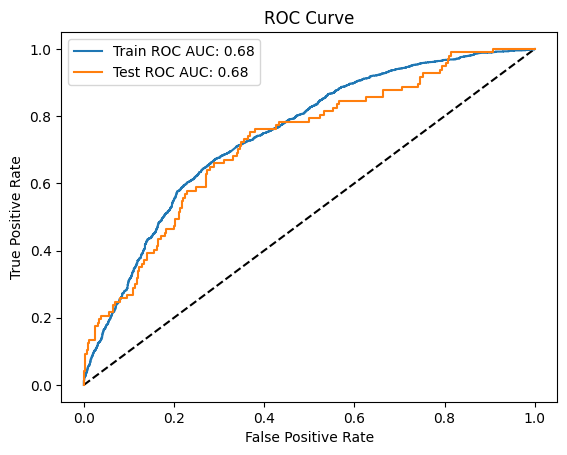


Confusion Matrix:


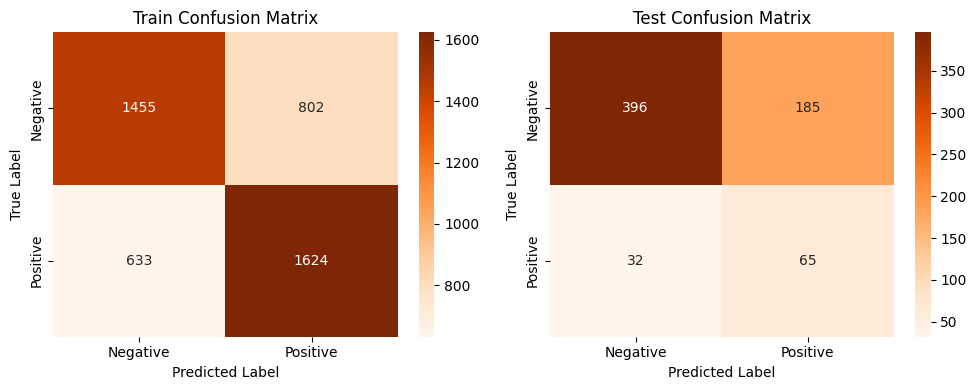


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.696839 | 0.644661 |   0.669735 | 2257      |
| 1.0          |    0.669415 | 0.719539 |   0.693572 | 2257      |
| accuracy     |    0.6821   | 0.6821   |   0.6821   |    0.6821 |
| macro avg    |    0.683127 | 0.6821   |   0.681654 | 4514      |
| weighted avg |    0.683127 | 0.6821   |   0.681654 | 4514      |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.925234 | 0.681583 |   0.784936 | 581        |
| 1.0          |    0.26     | 0.670103 |   0.37464  |  97        |
| accuracy     |    0.679941 | 0.679941 |   0.679941 |   0.679941 |
| macro avg    |    0.592617 | 0.675843 |   0.579788 | 678        |
| weighted avg |    0.83006  | 0.679941 |   0.726235 | 678      

In [43]:
svm_model = SVC(kernel='linear', random_state=0, probability=True)
svm_score = evaluate_model(svm_model, X_smote, X_test, y_smote, y_test)

In [44]:
score['SVM'] = svm_score
score

,Logistic regression,Random Forest,XGB,Naive Bayes,SVM
Precision Train,0.690548,1.000000,0.990998,0.644566,0.683127
Precision Test,0.825380,0.801045,0.804144,0.817170,0.830060
Recall Train,0.690297,1.000000,0.990917,0.610102,0.682100
Recall Test,0.694690,0.794985,0.817109,0.802360,0.679941
Accuracy Train,0.690297,1.000000,0.990917,0.610102,0.682100
Accuracy Test,0.694690,0.794985,0.817109,0.802360,0.679941
ROC-AUC Train,0.690297,1.000000,0.990917,0.610102,0.682100
ROC-AUC Test,0.667273,0.596971,0.592704,0.635626,0.675843
F1 macro Train,0.690195,1.000000,0.990917,0.585392,0.681654
F1 macro Test,0.737263,0.797934,0.810131,0.809195,0.726235


In [45]:
score_t=score.transpose()
score_t
remove_models = score_t[score_t['Recall Train']>=0.95].index
adj = score_t.drop(remove_models)                   
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,ROC-AUC Train,ROC-AUC Test,F1 macro Train,F1 macro Test
Logistic regression,0.690548,0.82538,0.690297,0.694690,0.690297,0.694690,0.690297,0.667273,0.690195,0.737263
Naive Bayes,0.644566,0.81717,0.610102,0.802360,0.610102,0.802360,0.610102,0.635626,0.585392,0.809195
SVM,0.683127,0.83006,0.682100,0.679941,0.682100,0.679941,0.682100,0.675843,0.681654,0.726235


In [49]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models
     

metrics = ['Precision','Recall', 'Accuracy', 'ROC-AUC', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: SVM - 0.8301
Recall: Naive Bayes - 0.8024
Accuracy: Naive Bayes - 0.8024
ROC-AUC: SVM - 0.6758
F1 macro: Naive Bayes - 0.8092
